In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.read_csv("extraction_outputs/extraction_diagnostics.csv")["Extraction_Type"].value_counts()

Extraction_Type
window    924686
primer    805299
Name: count, dtype: int64

In [4]:
orig = pd.read_csv("extraction_outputs/extraction_diagnostics.csv")
primer = pd.read_csv("extraction_outputs/primer_extracted_sequences.csv")

print("Total sequences:", len(orig))
print("Primer sequences:", len(primer))
print(f"Percentage covered by primer sequences: {len(primer) / len(orig) * 100:.2f}%")

Total sequences: 1729985
Primer sequences: 805299
Percentage covered by primer sequences: 46.55%


In [5]:
primer = pd.read_csv("extraction_outputs/primer_extracted_sequences.csv")

# Load FULL dataset (original parquet with species)
orig = pd.read_parquet("coi_validated_df_leray.parquet")

primer_species = set(primer["Species"])
all_species = set(orig["Species"])

window_only_species = all_species - primer_species

print("Total species:", len(all_species))
print("Primer species:", len(primer_species))
print("Window-only species:", len(window_only_species))
print("Primer species coverage:", len(primer_species) / len(all_species))


Total species: 224749
Primer species: 153907
Window-only species: 70842
Primer species coverage: 0.6847950380201914


In [6]:
primer["Primer_Family"].value_counts()

Primer_Family
leray     650679
folmer    154620
Name: count, dtype: int64

In [7]:
primer["Primer_Family"].value_counts(normalize=True) * 100

Primer_Family
leray     80.799678
folmer    19.200322
Name: proportion, dtype: float64

In [8]:
# Get species covered by each primer family
folmer_species = set(primer[primer["Primer_Family"] == "folmer"]["Species"].unique())
leray_species = set(primer[primer["Primer_Family"] == "leray"]["Species"].unique())

# Total unique species across all primers
total_species = primer["Species"].nunique()

# Calculate percentages
folmer_pct = len(folmer_species) / total_species * 100
leray_pct = len(leray_species) / total_species * 100

# Species covered by both
both_species = folmer_species & leray_species
both_pct = len(both_species) / total_species * 100

print(f"Species covered by Folmer: {len(folmer_species)} ({folmer_pct:.2f}%)")
print(f"Species covered by Leray: {len(leray_species)} ({leray_pct:.2f}%)")
print(f"Species covered by both: {len(both_species)} ({both_pct:.2f}%)")

Species covered by Folmer: 49802 (32.36%)
Species covered by Leray: 128482 (83.48%)
Species covered by both: 24377 (15.84%)


In [9]:
# Calculate species sets
primer_species = set(primer["Species"])
all_species = set(orig["Species"])
window_only_species = all_species - primer_species

# Get species covered by each primer family
folmer_species = set(primer[primer["Primer_Family"] == "folmer"]["Species"].unique())
leray_species = set(primer[primer["Primer_Family"] == "leray"]["Species"].unique())

# Calculate overlaps
both_species = folmer_species & leray_species
leray_only = leray_species - both_species
folmer_only = folmer_species - both_species

# Total species count
total_species = len(all_species)

# Data for pie chart
categories = ['Leray Only', 'Folmer Only', 'Both Primers', 'Window Only']
species_counts = [len(leray_only), len(folmer_only), len(both_species), len(window_only_species)]
percentages = [(count / total_species * 100) for count in species_counts]

In [10]:
# Print summary
print("\n=== Species Coverage Summary ===")
print(f"Total species: {total_species:,}")
print(f"\nBreakdown:")
print(f"  Leray only: {len(leray_only):,} ({len(leray_only)/total_species*100:.2f}%)")
print(f"  Folmer only: {len(folmer_only):,} ({len(folmer_only)/total_species*100:.2f}%)")
print(f"  Both primers: {len(both_species):,} ({len(both_species)/total_species*100:.2f}%)")
print(f"  Window only: {len(window_only_species):,} ({len(window_only_species)/total_species*100:.2f}%)")
print(f"\nTotal primer coverage: {len(primer_species):,} ({len(primer_species)/total_species*100:.2f}%)")


=== Species Coverage Summary ===
Total species: 224,749

Breakdown:
  Leray only: 104,105 (46.32%)
  Folmer only: 25,425 (11.31%)
  Both primers: 24,377 (10.85%)
  Window only: 70,842 (31.52%)

Total primer coverage: 153,907 (68.48%)


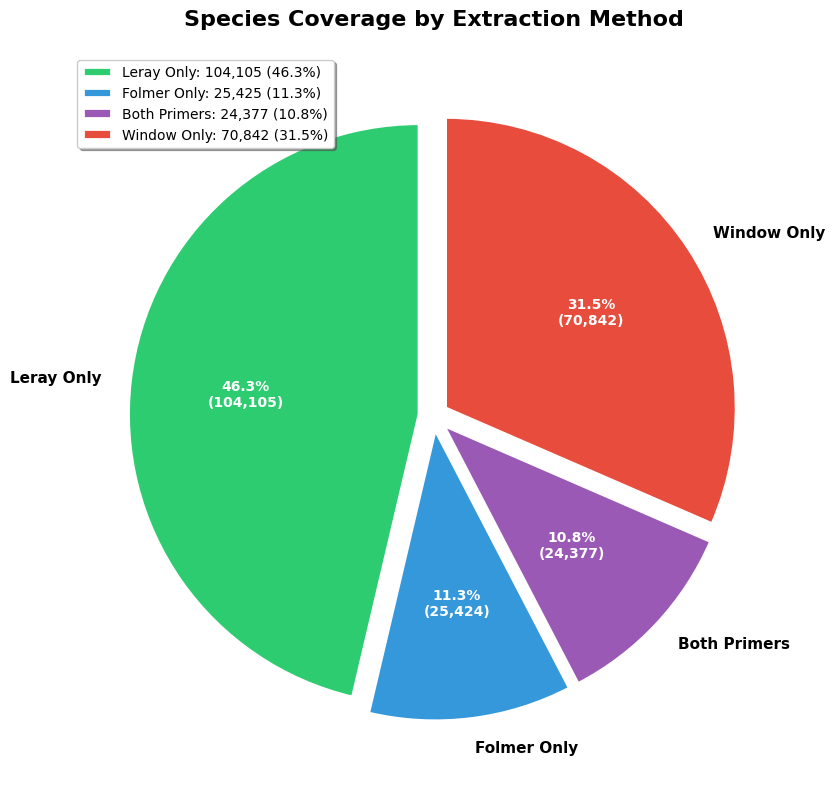

In [13]:
# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = plt.pie(
    species_counts, 
    labels=categories,
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100 * total_species):,})',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 11, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.title('Species Coverage by Extraction Method', 
          fontsize=16, fontweight='bold', pad=20)

# Add a legend with more details
legend_labels = [
    f'Leray Only: {len(leray_only):,} ({len(leray_only)/total_species*100:.1f}%)',
    f'Folmer Only: {len(folmer_only):,} ({len(folmer_only)/total_species*100:.1f}%)',
    f'Both Primers: {len(both_species):,} ({len(both_species)/total_species*100:.1f}%)',
    f'Window Only: {len(window_only_species):,} ({len(window_only_species)/total_species*100:.1f}%)'
]
plt.legend(legend_labels, loc='best', fontsize=10, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

In [4]:
from graphviz import Digraph

dot = Digraph("sequence_extraction",
              graph_attr={
                  "rankdir": "TB",        # Top → Bottom
                  "splines": "ortho",
                  "nodesep": "0.6",
                  "ranksep": "0.9"
              },
              node_attr={
                  "shape": "box",
                  "style": "rounded,filled",
                  "fillcolor": "white",
                  "fontsize": "12"
              },
              edge_attr={
                  "arrowsize": "0.8"
              })

# Nodes
dot.node("input", "Input DNA Sequence")

dot.node("folmer", "Folmer Primer Match")
dot.node("leray",  "Leray Primer Match")
dot.node("window", "Fallback Sliding Window Extraction")

dot.node("output", "Extracted Region")

# Vertical pipeline
dot.edge("input", "folmer")
dot.edge("folmer", "leray", label="if fail", fontsize="10")
dot.edge("leray", "window", label="if fail", fontsize="10")

dot.edge("folmer", "output", label="if success", fontsize="10")
dot.edge("leray",  "output", label="if success", fontsize="10")
dot.edge("window", "output")

# Save
dot.render("sequence_extraction_vertical", format="svg", cleanup=True)


'sequence_extraction_vertical.svg'